## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [52]:
show(DF_raw_paintings)

Loading ITables v2.5.2 from the internet... (need help?)


In [53]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

In [54]:
myCols = ['Height_in', 'Width_in']
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))
DF[myCols].dtypes

Height_in    float64
Width_in     float64
dtype: object

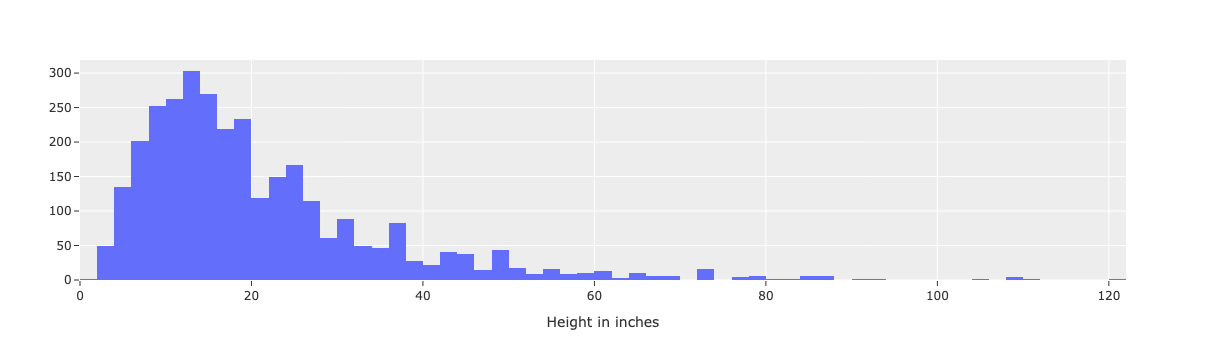

In [55]:
fig = px.histogram(DF, x = 'Height_in')
fig.update_layout(template = 'ggplot2',
                  xaxis_title='Height in inches',
                  yaxis_title='')
fig.show()

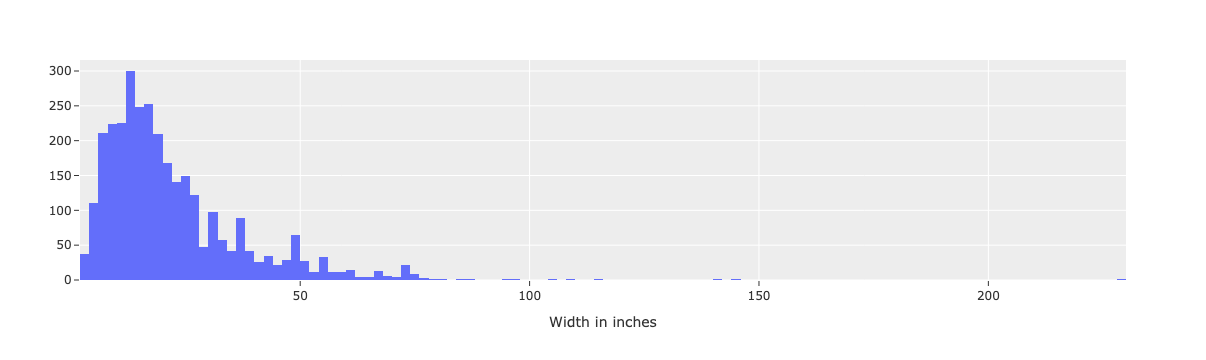

In [56]:
fig = px.histogram(DF, x = 'Width_in')
fig.update_layout(template = 'ggplot2',
                  xaxis_title='Width in inches',
                  yaxis_title='')
fig.show()

**Q2** Explain in words what these plots tell you about the data.

We see the amount of paintings with the same amount of heights and widths


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

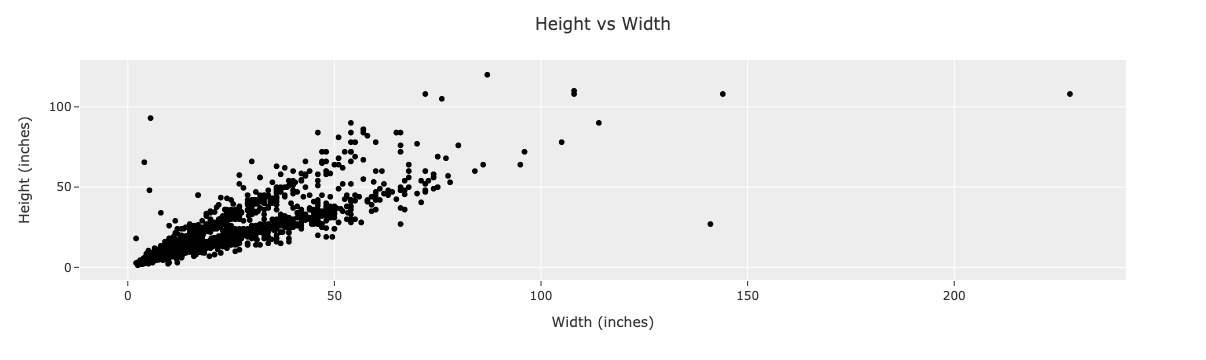

In [57]:
fig = px.scatter(DF,x='Width_in',
                 y='Height_in',
                 color_discrete_sequence = ['black'])
fig.update_layout(template='ggplot2',title='Height vs Width',
                  title_x=0.5,
                  xaxis_title='Width (inches)',
                  yaxis_title='Height (inches)')
fig.show()
                  

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

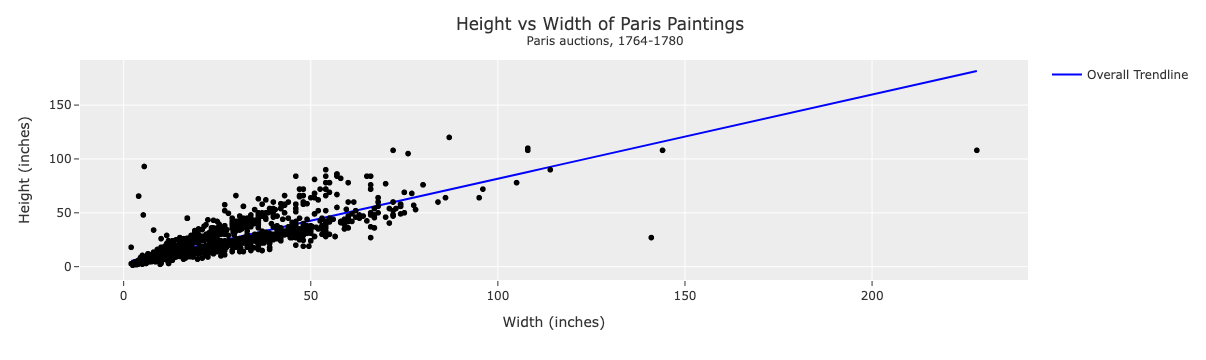

In [58]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

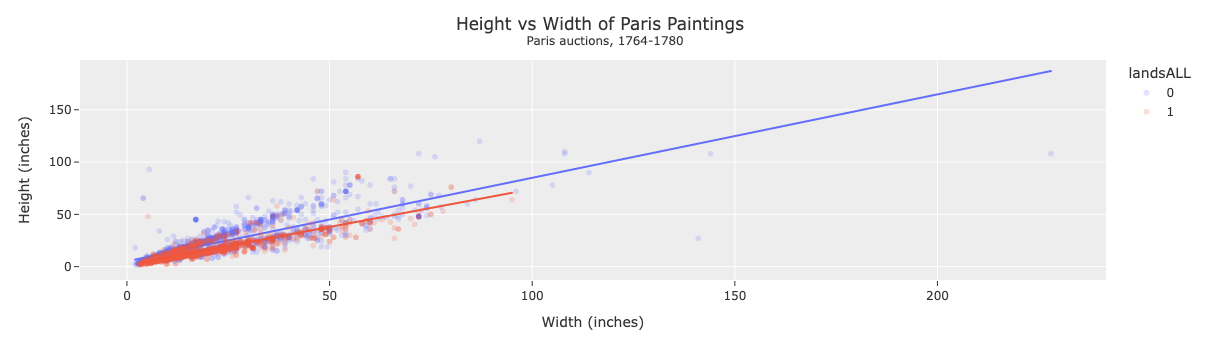

In [59]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

In [60]:
DF1 = DF_raw_paintings.copy()
DF1.replace('',np.nan,inplace=True)
DF1.replace('n/a',np.nan,inplace=True)
DF1.replace('NaN',np.nan,inplace=True)
show(DF1)

Loading ITables v2.5.2 from the internet... (need help?)


In [61]:
#1 I chose the variable 'relig'

#2
DF1['relig_str'] = DF1['relig'].apply(lambda x: 'Religous' if x == 1 else 'Not Religous')

#3
DF1['relig_str'].value_counts()
# We see that a majority are not religous 


relig_str
Not Religous    2826
Religous         567
Name: count, dtype: int64

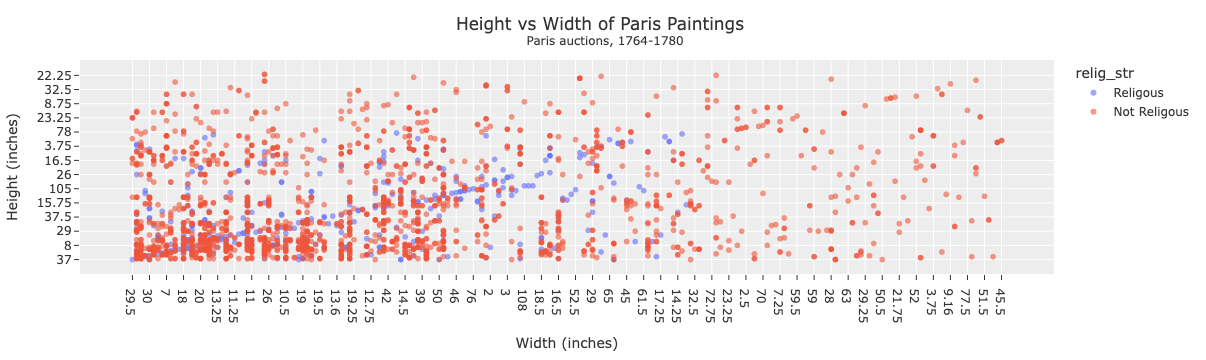

In [62]:
DF1['relig_str'] = DF1['relig_str'].apply(lambda x: str(x))
fig = px.scatter(
    DF1,
    x='Width_in',
    y="Height_in",
    color="relig_str",
    trendline="ols",
      trendline_scope="group",
    opacity=0.6)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [63]:
 !conda install -y scikit-learn

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: - 


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [84]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [85]:
model = DF[['price', 'Surface']].copy()
model.dtypes
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


In [86]:
model = model.dropna(subset=['price', 'Surface'])

model['Surface'] = model['Surface'].astype(str).str.replace(",", "")
model['Surface'] = model['Surface'].astype(float)
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


In [87]:
X = model['Surface'].values.reshape(-1,1)
y = model['price'].values
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


In [88]:
LM = LinearRegression()
LM.fit(X,y)

LinearRegression()

In [92]:
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


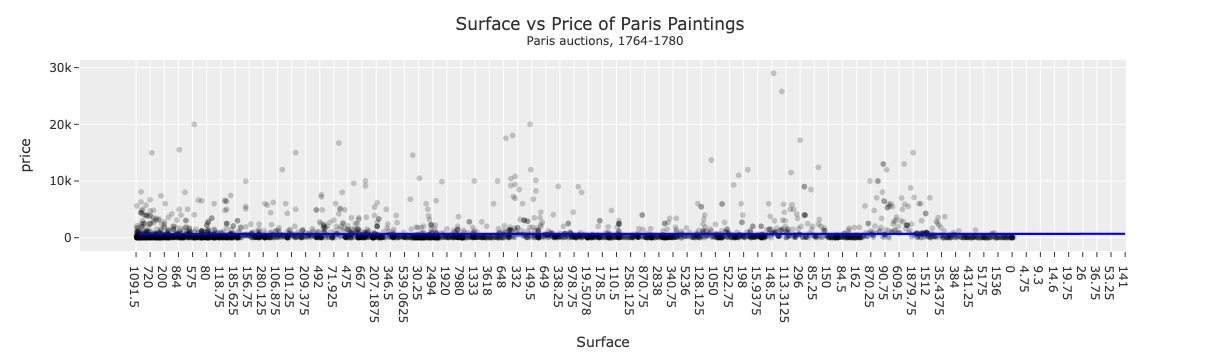

In [93]:
fig = px.scatter(DF,
                 x='Surface',
                 y="price",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Surface vs Price of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5)

# Add the line our model would predict
model = pd.DataFrame()
model['w'] = DF['Width_in']
model['y'] = LM.coef_*model['w']+LM.intercept_
model = model.sort_values('w')

fig.add_trace(
    px.line(model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


In [131]:
model = DF[['school_pntg', 'Surface']].copy()
show(model.dtypes)
show(model)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


In [147]:
model = model.dropna(subset=['school_pntg', 'Surface'])

model['school_pntg'] = (model['school_pntg'].astype(str))
model.dtypes
#show(model)

KeyError: ['school_pntg', 'Surface']

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
X = model['school_pntg'].values.reshape(-1,1)
y = model['Surface'].values

encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [137]:
categories = encoder.categories_[0]
categories

array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)

In [139]:
# Look at each category and encoding
result = model.groupby('school_pntg',as_index=False).first()
encoded_data = encoder.transform(result['school_pntg'].values.reshape(-1,1))



for i,e in enumerate(encoded_data.toarray()):
    print(categories[i])
    print(e)
    print('---------------------------')

A
[1. 0. 0. 0. 0. 0. 0.]
---------------------------
D/FL
[0. 1. 0. 0. 0. 0. 0.]
---------------------------
F
[0. 0. 1. 0. 0. 0. 0.]
---------------------------
G
[0. 0. 0. 1. 0. 0. 0.]
---------------------------
I
[0. 0. 0. 0. 1. 0. 0.]
---------------------------
S
[0. 0. 0. 0. 0. 1. 0.]
---------------------------
X
[0. 0. 0. 0. 0. 0. 1.]
---------------------------


In [146]:
LM = LinearRegression()

LM.fit(X, y)

LinearRegression()

In [142]:
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[-392.07405546 -266.70348061  122.28772343 -393.21155591  142.65081982
 1051.64022987 -264.58968116]
------------------------------
686.0740423489735


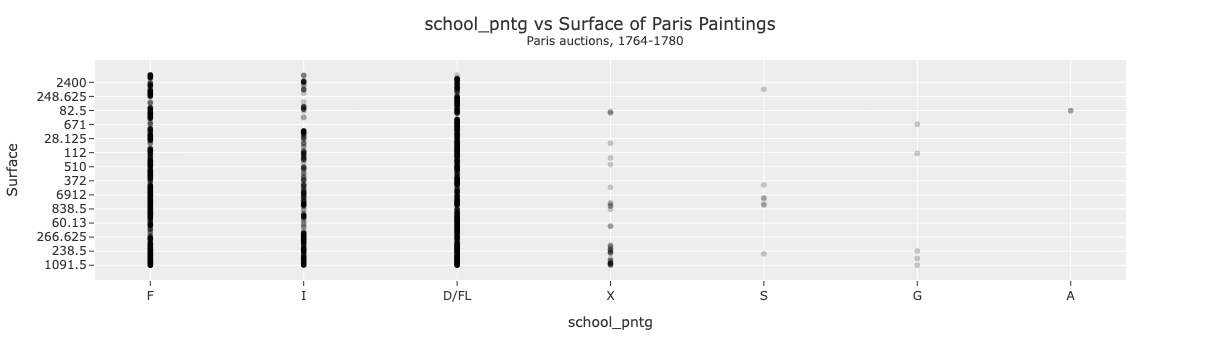

In [145]:
fig = px.scatter(DF,
                 x='school_pntg',
                 y='Surface',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='school_pntg vs Surface of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5)


fig.show()